In [6]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [15]:
import cv2
import numpy as np

# List to store the points
points = []

# Callback function to capture the points
def select_point(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        # Draw the point on the image
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow("Image", image)
        if len(points) == 2:
            cv2.line(image, points[0], points[1], (255, 0, 0), 2)
            cv2.imshow("Image", image)
            return

# Load the image
# image_path = "../data/children/stimuli_R/1005.png"
image_path = "../stimuli/transparent_mask/stimuli_G.png"
image = cv2.imread(image_path)

# Create a window and set a mouse callback function
cv2.imshow("Image", image)
cv2.setMouseCallback("Image", select_point)

# Wait until the user has selected 2 points
cv2.waitKey(0)
cv2.destroyAllWindows()

# Calculate the distance if two points are selected
if len(points) == 2:
    point1, point2 = points
    distance = np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    print(f"The distance between the points is: {distance:.2f} pixels")

    # Optionally, save the image with the points and line
    output_path = "/mnt/data/marked_image.png"
    cv2.imwrite(output_path, image)
else:
    print("Please select exactly two points.")

The distance between the points is: 72.01 pixels


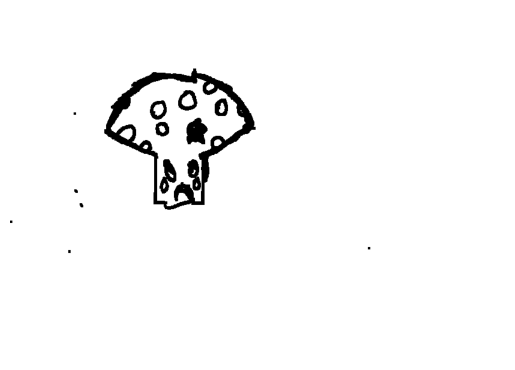

True

In [10]:
# Load the image
image_path = "../data/children/stimuli_G/1002.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

original_height, original_width = image.shape[:2]

# Calculate the new width (reduce by 3 times) and maintain aspect ratio
new_width = original_width // 3
new_height = int(original_height * (new_width / original_width))

# Resize the image
resized_image = cv2.resize(image, (new_width, new_height))


# Thresholding to create a binary image (convert grey lines to black)
_, binary_image = cv2.threshold(resized_image, 200, 255, cv2.THRESH_BINARY_INV)

# # Dilation to thicken the lines
kernel = np.ones((2,2), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=3)

# # Inverting the image back to get black lines on a white background
final_image = cv2.bitwise_not(dilated_image)




# Display the final image
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()


# Save the final image
output_path = "drawing.png"
cv2.imwrite(output_path, final_image)


In [ ]:
# Load the image
image_path = "../data/children/stimuli_G/1015.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Thresholding to create a binary image (convert grey lines to black)
_, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

# Dilation to thicken the lines
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Find contours to detect the area of the drawing
contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])

# Calculate the center of the bounding box
center_x, center_y = x + w // 2, y + h // 2

# Define the size of the cropped area (400x400)
crop_size = 400
half_crop_size = crop_size // 2

# Calculate the cropping box boundaries
start_x = max(0, center_x - half_crop_size)
start_y = max(0, center_y - half_crop_size)

end_x = start_x + crop_size
end_y = start_y + crop_size

# Make sure the cropping box does not go out of the image boundaries
start_x = min(start_x, image.shape[1] - crop_size)
start_y = min(start_y, image.shape[0] - crop_size)

# Crop the image
cropped_image = image[start_y:end_y, start_x:end_x]

# Inverting the image back to get black lines on a white background
_, binary_cropped = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY_INV)
dilated_cropped = cv2.dilate(binary_cropped, kernel, iterations=1)
final_image = cv2.bitwise_not(dilated_cropped)

# Display the final image
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# # Resize originals

# def add_padding(image):
#     # Get the current size of the image
#     height, width = image.shape[:2]

#     # Calculate the padding needed to make the height 400
#     total_padding = 400 - height
#     top_padding = total_padding // 2
#     bottom_padding = total_padding - top_padding

#     # Add padding to the image
#     padded_image = cv2.copyMakeBorder(image, top_padding, bottom_padding, 0, 0, cv2.BORDER_CONSTANT, value=[255, 255, 255])

#     return padded_image

# for image_path in sorted(os.listdir("../stimuli/originals/")):
#     try:
#         image = cv2.imread("../stimuli/originals/" + image_path, cv2.IMREAD_GRAYSCALE)
#         print(image.shape)
#         # Add padding to make the image 400x400
#         final_image = add_padding(image)

#     except:
#         # Crop 4 pixels from the top and bottom
#         final_image = image[5:-4, :]  # This removes 4 pixels from the top and bottom
    
#     print(final_image.shape)
#     output_path = "../stimuli/originals/" + image_path
#     cv2.imwrite(output_path, final_image)